In [94]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
# Create a file path
filepath = "../Resources/data.csv"
# Read in the data.
df = pd.read_csv(filepath)
df.head()

,Card,Quantity,Pilot,Archetype,Event,Date Posted,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price EUR,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2019-01-25,({T}: Add {W} or {U}.)\nAs Hallowed Fountain e...,Land — Plains Island,11.93,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2023-04-21,({T}: Add {W} or {U}.)\nPrairie Stream enters ...,Land — Plains Island,0.21,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2020-04-17,({T}: Add {W} or {U}.)\nIrrigated Farmland ent...,Land — Plains Island,0.76,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2023-04-21,"{T}: Add {C}.\n{2}, {T}, Sacrifice Field of Ru...",Land,0.05,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,3.70,4.80,rare


In [96]:
df.drop(columns=["Date Posted"], inplace=True)

In [97]:
df.head()

,Card,Quantity,Pilot,Archetype,Event,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price EUR,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2019-01-25,({T}: Add {W} or {U}.)\nAs Hallowed Fountain e...,Land — Plains Island,11.93,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2023-04-21,({T}: Add {W} or {U}.)\nPrairie Stream enters ...,Land — Plains Island,0.21,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2020-04-17,({T}: Add {W} or {U}.)\nIrrigated Farmland ent...,Land — Plains Island,0.76,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2023-04-21,"{T}: Add {C}.\n{2}, {T}, Sacrifice Field of Ru...",Land,0.05,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,3.70,4.80,rare


In [98]:
df.drop(columns=["Price EUR"], inplace=True)

In [99]:
df.head()

,Card,Quantity,Pilot,Archetype,Event,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2019-01-25,({T}: Add {W} or {U}.)\nAs Hallowed Fountain e...,Land — Plains Island,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2023-04-21,({T}: Add {W} or {U}.)\nPrairie Stream enters ...,Land — Plains Island,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2020-04-17,({T}: Add {W} or {U}.)\nIrrigated Farmland ent...,Land — Plains Island,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2023-04-21,"{T}: Add {C}.\n{2}, {T}, Sacrifice Field of Ru...",Land,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,4.80,rare


In [143]:
df.loc[df["Type Line"].str.contains("Land"), "Colours"] = "['L']"

df.loc[df["Mana Cost"].isna(), "Mana Cost"] = "['L']"

df.head()

,Card,Quantity,Pilot,Archetype,Event,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2019-01-25,({T}: Add {W} or {U}.)\nAs Hallowed Fountain e...,Land — Plains Island,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2023-04-21,({T}: Add {W} or {U}.)\nPrairie Stream enters ...,Land — Plains Island,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2020-04-17,({T}: Add {W} or {U}.)\nIrrigated Farmland ent...,Land — Plains Island,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2023-04-21,"{T}: Add {C}.\n{2}, {T}, Sacrifice Field of Ru...",Land,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,4.80,rare


In [148]:
price_drop_df = df.dropna(subset=['Price USD'])

In [149]:
price_drop_df #the dataframe for the linregress

,Card,Quantity,Pilot,Archetype,Event,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2019-01-25,({T}: Add {W} or {U}.)\nAs Hallowed Fountain e...,Land — Plains Island,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2023-04-21,({T}: Add {W} or {U}.)\nPrairie Stream enters ...,Land — Plains Island,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2020-04-17,({T}: Add {W} or {U}.)\nIrrigated Farmland ent...,Land — Plains Island,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2023-04-21,"{T}: Add {C}.\n{2}, {T}, Sacrifice Field of Ru...",Land,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,4.80,rare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,The Chain Veil,1,Pilot 8,Mono-Green Devotion,MTG SEA Championship,Sideboard,4.0,{4},[],2014-07-18,"At the beginning of your end step, if you didn...",Legendary Artifact,26.69,mythic
2302,Tormod's Crypt,1,Pilot 8,Mono-Green Devotion,MTG SEA Championship,Sideboard,0.0,['L'],[],2020-07-03,"{T}, Sacrifice Tormod's Crypt: Exile target pl...",Artifact,0.24,uncommon
2303,Voracious Hydra,2,Pilot 8,Mono-Green Devotion,MTG SEA Championship,Sideboard,2.0,{X}{G}{G},['G'],2019-07-12,Trample\nVoracious Hydra enters the battlefiel...,Creature — Hydra,4.21,rare
2304,Treasure Vault,1,Pilot 8,Mono-Green Devotion,MTG SEA Championship,Sideboard,0.0,['L'],['L'],2021-07-23,"{T}: Add {C}.\n{X}{X}, {T}, Sacrifice Treasure...",Artifact Land,4.78,rare


In [150]:
# count number of colors/color combinations and the number of each occurrance
colours = df['Colours'].value_counts()
print(colours)
print(type(colours))
# 23 variations as series. I don't see any null values or bad data.

Colours
['L']                   620
['B']                   273
[]                      272
['U']                   268
['W']                   266
['G']                   179
['R']                   171
['B', 'R']               76
['U', 'W']               61
['G', 'R']               29
['G', 'U']               24
['B', 'U']               14
['B', 'G']               10
['G', 'W']                8
['R', 'U']                7
['R', 'W']                5
['B', 'W']                5
['G', 'R', 'W']           4
['B', 'G', 'U']           4
['B', 'G', 'U', 'W']      4
['G', 'R', 'U', 'W']      3
['B', 'R', 'U']           1
['R', 'U', 'W']           1
['G', 'R', 'U']           1
Name: count, dtype: int64


TypeError: 'int' object is not callable

In [151]:
# Update 'Colours' column based on the condition 'Type Line' contains 'Land'
# This will differentiate between Lands and Artifacts, which are both colorless
df.loc[df["Type Line"].str.contains("Land"), "Colours"] = "['L']"
print(colours)

Colours
['L']                   620
['B']                   273
[]                      272
['U']                   268
['W']                   266
['G']                   179
['R']                   171
['B', 'R']               76
['U', 'W']               61
['G', 'R']               29
['G', 'U']               24
['B', 'U']               14
['B', 'G']               10
['G', 'W']                8
['R', 'U']                7
['R', 'W']                5
['B', 'W']                5
['G', 'R', 'W']           4
['B', 'G', 'U']           4
['B', 'G', 'U', 'W']      4
['G', 'R', 'U', 'W']      3
['B', 'R', 'U']           1
['R', 'U', 'W']           1
['G', 'R', 'U']           1
Name: count, dtype: int64


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Card                  2306 non-null   object 
 1   Quantity              2306 non-null   int64  
 2   Pilot                 2306 non-null   object 
 3   Archetype             2306 non-null   object 
 4   Event                 2306 non-null   object 
 5   Main/Sideboard        2306 non-null   object 
 6   Mana Value            2306 non-null   float64
 7   Mana Cost             1679 non-null   object 
 8   Colours               2306 non-null   object 
 9   Most Recent Printing  2306 non-null   object 
 10  Card Text             2096 non-null   object 
 11  Type Line             2306 non-null   object 
 12  Price USD             2231 non-null   float64
 13  Rarity                2306 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 252.3+ KB


In [102]:
card_count = len(df["Card"].unique())

In [103]:
card_count

460

In [104]:
cards = df['Card'].unique()
cards_list = cards.tolist()

In [105]:
cards

array(['Hallowed Fountain', 'Prairie Stream', 'Irrigated Farmland',
       'Field of Ruin', 'Fabled Passage', 'Castle Ardenvale',
       'Castle Vantress', 'Otawara, Soaring City', 'Hall of Storm Giants',
       'Lay Down Arms', 'Farewell', 'Rewind',
       'March of Otherworldly Light', 'Mystical Dispute',
       'Hallowed Moonlight', 'Absorb', 'Censor', "Dovin's Veto",
       'The Celestus', 'Shark Typhoon', 'Make Disappear',
       'Teferi, Hero of Dominaria', 'Narset, Parter of Veils',
       'The Wandering Emperor', 'Change the Equation', 'Dig Through Time',
       'Island', 'Plains', 'Disdainful Stroke', 'Temporary Lockdown',
       'Aether Gust', 'Dream Trawler', 'Commit // Memory',
       'Unlicensed Hearse', 'Zirda, the Dawnwaker', 'Arboreal Grazer',
       'Boseiju, Who Endures', 'Lair of the Hydra',
       'Lier, Disciple of the Drowned', 'Hidden Strings',
       'Behold the Beyond', 'Breeding Pool', 'Dark Petition',
       'Bala Ged Recovery', 'Omniscience', 'Impulse',
    

In [106]:
mana_value = len(df["Mana Value"].unique())

In [107]:
mana_value

13

In [108]:
mana_v = df['Mana Value'].unique()
mana_v_list = mana_v.tolist()

In [109]:
mana_v

array([ 0.,  1.,  6.,  4.,  3.,  2.,  5.,  8., 10.,  7.,  9., 13., 11.])

In [110]:
colours = len(df["Colours"].unique())

In [111]:
colours

24

In [112]:
colours_list = df['Colours'].unique()
colours_list_list = colours_list.tolist()

In [113]:
colours_list

array(["['L']", "['W']", "['U']", "['U', 'W']", "['G']", '[]',
       "['R', 'W']", "['B']", "['R']", "['B', 'G', 'U']",
       "['G', 'R', 'W']", "['G', 'W']", "['G', 'R']", "['G', 'U']",
       "['B', 'R', 'U']", "['B', 'R']", "['B', 'U']", "['R', 'U']",
       "['R', 'U', 'W']", "['B', 'W']", "['B', 'G']",
       "['B', 'G', 'U', 'W']", "['G', 'R', 'U', 'W']", "['G', 'R', 'U']"],
      dtype=object)

In [114]:
mana_cost = len(df["Mana Cost"].unique())

In [115]:
mana_cost

130

In [116]:
mana_c = df['Mana Cost'].unique()
mana_c_list = mana_c.tolist()

In [117]:
mana_c

array([nan, '{W}', '{4}{W}{W}', '{2}{U}{U}', '{X}{W}', '{2}{U}', '{1}{W}',
       '{W}{U}{U}', '{2}{W}', '{W}{U}', '{2}{G}{G}', '{5}{U}', '{1}{U}',
       '{3}{W}{U}', '{1}{U}{U}', '{2}{W}{W}', '{6}{U}{U}', '{1}{W}{W}',
       '{2}{W}{W}{U}{U}', '{3}{U}', '{2}', '{1}{R/W}{R/W}', '{G}',
       '{3}{U}{U}', '{5}{B}{B}', '{3}{B}{B}', '{2}{G}', '{7}{U}{U}{U}',
       '{2}{R}', '{2}{B}{B}', '{B}{B}{G}{G}{G}{U}{U}', '{1}{G}', '{1}',
       '{U}{U}', '{6}{R}{G}{W}', '{1}{W}{W}{U}', '{1}{R}{R}', '{4}{G}{W}',
       '{6}{W}', '{R}{G}', '{1}{R}', '{2}{R}{G}', '{R}', '{R/G}{R/G}',
       '{2}{R}{R}', '{3}{R}', '{3}{G}{G}', '{2}{G}{G}{G}', '{2}{G/U}',
       '{4}', '{G}{G}{G}', '{3}{G}{G}{G}', '{U}{B}{B}{B}{R}', '{2}{B}',
       '{8}', '{3}', '{10}', '{5}', '{3}{G}', '{4}{R}{R}', '{1}{B}{B}',
       '{3}{W}{W}', '{5}{U}{U}', '{B}{R}', '{B}', '{1}{B}', '{3}{B}',
       '{1}{B}{R}', '{X}{B}{B}{B}', '{U}{B}', '{1}{U}{B}', '{U}',
       '{2}{U}{B}', '{3}{W/U}{W/U}', '{6}', '{1}{R}{G}', '{4}{R/G}',
   

In [118]:
player = len(df["Pilot"].unique())

In [119]:
player

48

In [120]:
pilot = df['Pilot'].unique()
pilot_list = pilot.tolist()

In [121]:
pilot

array(['Pilot 1', 'Pilot 2', 'Pilot 3', 'Pilot 4', 'Pilot 5', 'Pilot 6',
       'Pilot 7', 'Pilot 8', 'Pilot 9', 'Pilot 10', 'Pilot 11',
       'Pilot 12', 'Pilot 13', 'Pilot 14', 'Pilot 15', 'Pilot 16',
       'Pilot 17', 'Pilot 18', 'Pilot 19', 'Pilot 20', 'Pilot 21',
       'Pilot 22', 'Pilot 23', 'Pilot 24', 'Pilot 25', 'Pilot 26',
       'Pilot 27', 'Pilot 28', 'Pilot 29', 'Pilot 30', 'Pilot 31',
       'Pilot 32', 'Pilot 33', 'Pilot 34', 'Pilot 35', 'Pilot 36',
       'Pilot 37', 'Pilot 38', 'Pilot 39', 'Pilot 40', 'Pilot 41',
       'Pilot 42', 'Pilot 43', 'Pilot 44', 'Pilot 45', 'Pilot 46',
       'Pilot 47', 'Pilot 48'], dtype=object)

In [122]:
archetype = len(df["Archetype"].unique())

In [123]:
archetype

23

In [124]:
archetype_l = df['Archetype'].unique()
pilot_list = archetype_l.tolist()

In [125]:
archetype_l

array(['Azorius Control', 'Lotus Field Combo', 'Atarka Red',
       'Mono-Green Devotion', 'Rakdos Midrange', 'Dimir Rogues',
       'Gruul Vehicles', 'Jeskai Ascendancy Combo', 'Mono-Blue Spirits',
       'Abzan Greasefang', 'Rakdos Sacrifice', 'Enigmatic Fires',
       'Rona Combo', 'Omnath to Light', 'Mono-White Humans',
       'Azorius Spirits', 'Boros Convoke', 'Izzet Creativity',
       'Izzet Phoenix', 'Neoform Atraxa', 'Azorius Lotus Field',
       'Four-Color Elementals', 'Enigmatic-Fires'], dtype=object)

In [126]:
event = len(df["Event"].unique())

In [127]:
event

4

In [128]:
event_l = df['Event'].unique()
event_list = event_l.tolist()

In [129]:
event_l

array(['MTG China Open', 'Dreamhack Magic Showdown',
       'F2F Tour Championship', 'MTG SEA Championship'], dtype=object)

In [130]:
printing = len(df["Most Recent Printing"].unique())

In [131]:
printing

68

In [132]:
printing_l = df['Most Recent Printing'].unique()
printing_list = printing_l.tolist()

In [133]:
printing_list

['2019-01-25',
 '2023-04-21',
 '2020-04-17',
 '2020-07-03',
 '2022-04-29',
 '2022-06-10',
 '2022-02-18',
 '2021-07-23',
 '2022-11-18',
 '2019-10-04',
 '2015-07-17',
 '2019-05-03',
 '2021-09-24',
 '2020-04-24',
 '2018-04-27',
 '2023-10-13',
 '2016-04-08',
 '2022-09-09',
 '2019-07-12',
 '2020-01-24',
 '2013-05-03',
 '2023-05-08',
 '2018-07-13',
 '2014-07-18',
 '2018-01-19',
 '2020-08-07',
 '2015-10-02',
 '2016-09-30',
 '2022-07-08',
 '2020-07-17',
 '2016-08-26',
 '2021-02-05',
 '2017-04-28',
 '2023-02-03',
 '2017-07-14',
 '2016-01-22',
 '2008-10-03',
 '2015-03-27',
 '2021-11-19',
 '2018-10-05',
 '2017-01-20',
 '2013-09-27',
 '2019-06-14',
 '2018-11-16',
 '2021-04-23',
 '2017-09-29',
 '2016-07-22',
 '2018-03-16',
 '2016-09-02',
 '2017-06-16',
 '2020-09-25',
 '2021-03-19',
 '2022-04-22',
 '2006-02-03',
 '2014-05-02',
 '2020-11-20',
 '2018-12-07',
 '2015-01-23',
 '2013-02-01',
 '2012-10-05',
 '2023-05-12',
 '2014-11-07',
 '2013-07-19',
 '2022-10-07',
 '2011-05-13',
 '2014-09-26',
 '2017-03-

In [134]:
type = len(df["Type Line"].unique())

In [135]:
type

181

In [136]:
type_l = df['Type Line'].unique()
type_l_list = type_l.tolist()

In [137]:
type_l

array(['Land — Plains Island', 'Land', 'Legendary Land', 'Sorcery',
       'Instant', 'Creature — Bird Wizard', 'Enchantment',
       'Legendary Planeswalker — Teferi',
       'Legendary Planeswalker — Narset', 'Legendary Planeswalker',
       'Basic Land — Island', 'Creature — Sphinx', 'Instant // Sorcery',
       'Artifact — Vehicle', 'Legendary Creature — Elemental Fox',
       'Creature — Beast', 'Legendary Creature — Human Wizard',
       'Land — Forest Island', 'Sorcery // Land',
       'Creature — Human Cleric', 'Artifact',
       'Legendary Creature — Elder Dinosaur', 'Creature — Satyr Druid',
       'Legendary Creature — Elder Dragon', 'Enchantment — Aura',
       'Creature — Giant // Instant — Adventure', 'Land // Land',
       'Legendary Creature — Human Pirate', 'Legendary Creature — Satyr',
       'Creature — Phoenix', 'Land — Desert', 'Creature — Human Monk',
       'Enchantment — Saga // Enchantment Creature — Human Shaman',
       'Creature — Goblin Warrior Ally', 'Crea

In [66]:
rare = len(df["Rarity"].unique())

In [67]:
rare

4

In [138]:
rare_l = df['Rarity'].unique()
rare_list = rare_l.tolist()

In [139]:
rare_list

['rare', 'uncommon', 'common', 'mythic']

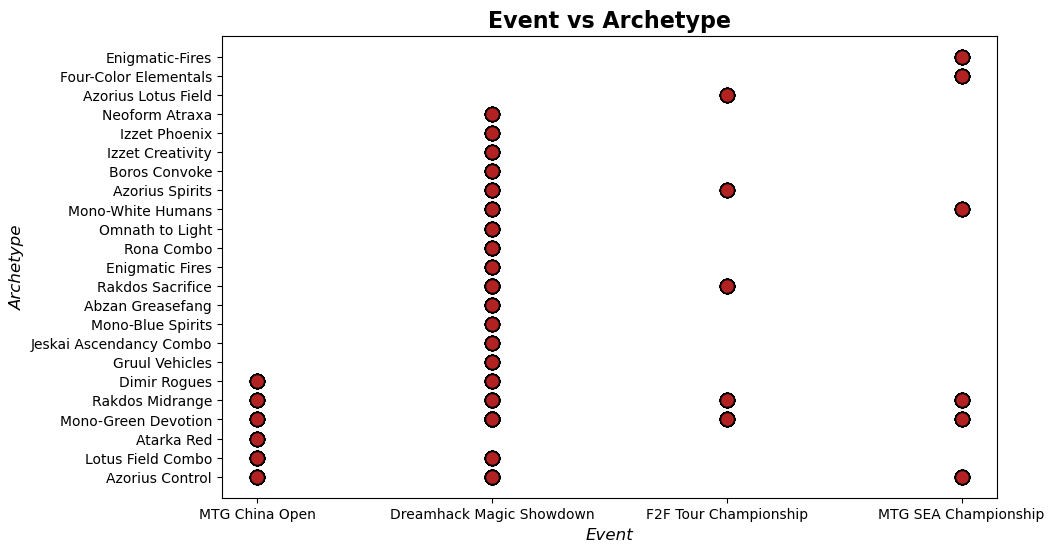

In [13]:
# Step 1: Get the Data
x = df.Event
y = df.Archetype

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Event", fontsize=12, fontstyle="italic")
plt.ylabel("Archetype", fontsize=12, fontstyle="italic")
plt.title("Event vs Archetype", fontweight="bold", fontsize=16)
# Save the figure
#plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()